In [4]:
import altair as alt
from vega_datasets import data
import pandas as pd
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [7]:
world = data.world_110m()
world_map = alt.topo_feature(data.world_110m.url, 'countries')
world_map

UrlData({
  format: TopoDataFormat({
    feature: 'countries',
    type: 'topojson'
  }),
  url: 'https://cdn.jsdelivr.net/npm/vega-datasets@v1.29.0/data/world-110m.json'
})

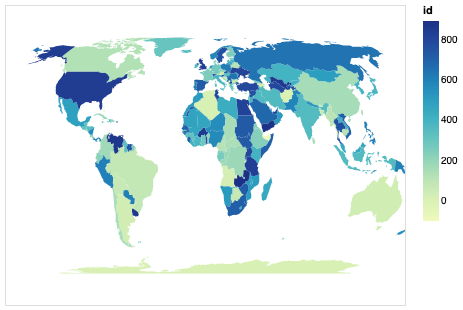

In [13]:
country_ids = pd.read_csv("../data/processed/happiness_mapped.csv")
map_click = alt.selection_multi()

(alt.Chart(world_map).mark_geoshape().transform_lookup(
    lookup='id',
    from_=alt.LookupData(country_ids, 'id', ['Country']))
 .encode(tooltip='Country:O', 
         color='id:Q',
         opacity=alt.condition(map_click, alt.value(1), alt.value(0.2)))
 .add_selection(map_click)
 .project('equalEarth', scale=90))